In [43]:

import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                header= None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


0) ID number 

1) Diagnosis (M = malignant, B = benign) 

    
2-31) Ten real-valued features are computed for each cell nucleus: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB90D58A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BC022F8780>]], dtype=object)

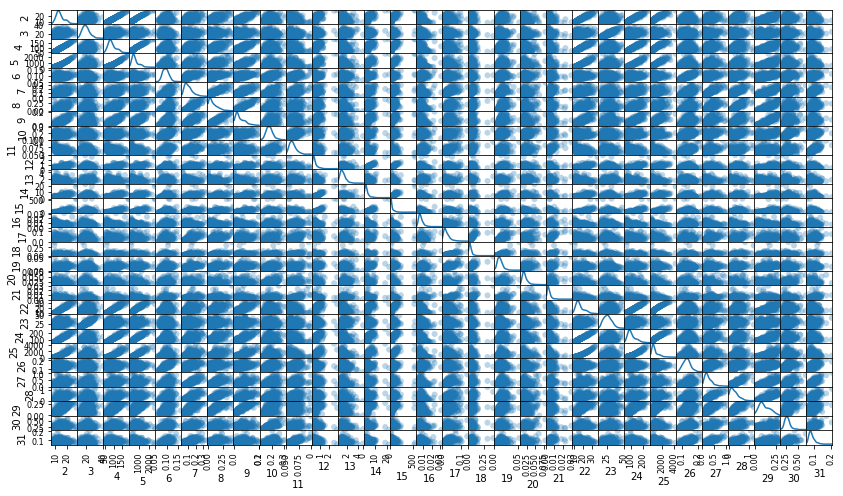

In [46]:
pd.plotting.scatter_matrix(df.loc[:,2:32], alpha = 0.3, figsize = (14,8), diagonal = 'kde',marker='o')


A feature that can be predicted from other features would not really give us much additional information and thus, would be a fit candidate for removal, if we ever need it to make the dataset more manageable.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_feature = df.loc[:,2:].values

#M:惡性腫瘤 B:良性腫瘤
y_target = df.loc[:,1].values

#M->1;B->0
y_target = le.fit_transform(y_target)
#le.transform(['M','B'])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature,y_target,test_size=0.2,random_state=1)

In [49]:
print (X_train.ndim)
print (y_train.ndim)
print (X_train.shape)
print (y_train.shape)
len(X_train[:][1])
len(y_train[:])


2
1
(455, 30)
(455,)


455

No 2 feature 


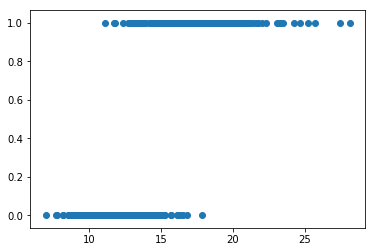

No 3 feature 


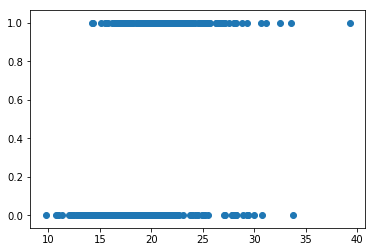

No 4 feature 


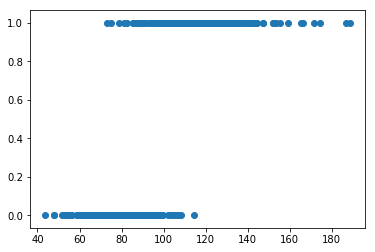

No 5 feature 


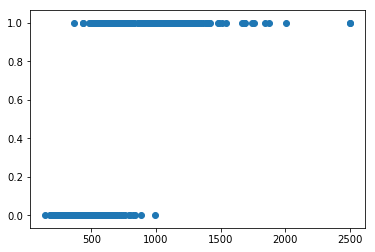

No 6 feature 


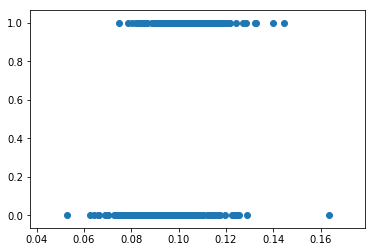

No 7 feature 


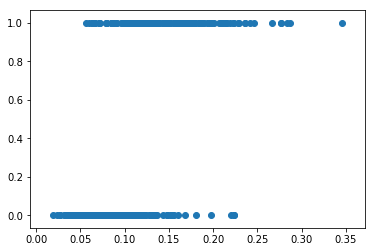

No 8 feature 


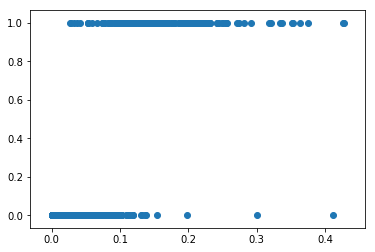

No 9 feature 


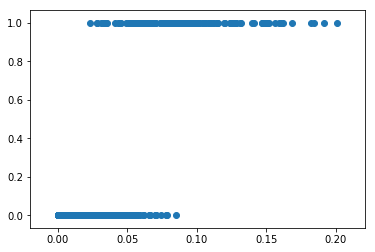

No 10 feature 


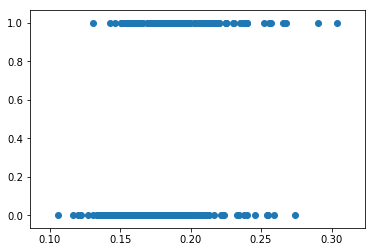

No 11 feature 


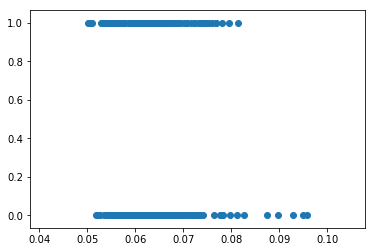

No 12 feature 


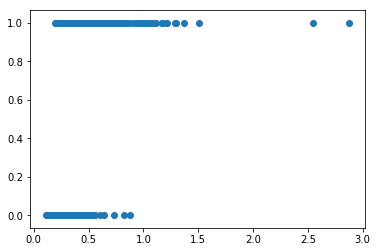

No 13 feature 


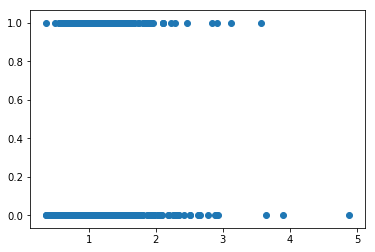

No 14 feature 


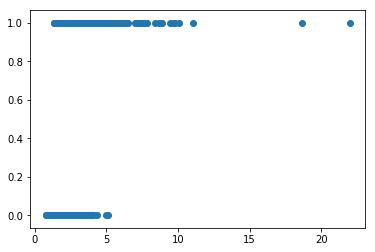

No 15 feature 


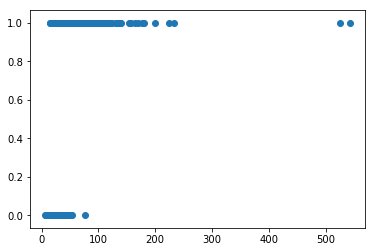

No 16 feature 


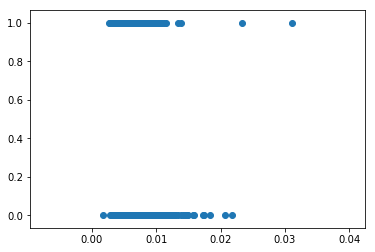

No 17 feature 


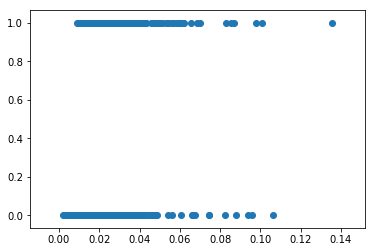

No 18 feature 


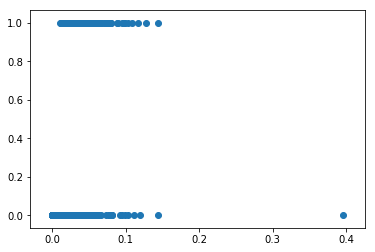

No 19 feature 


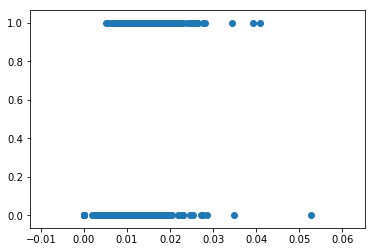

No 20 feature 


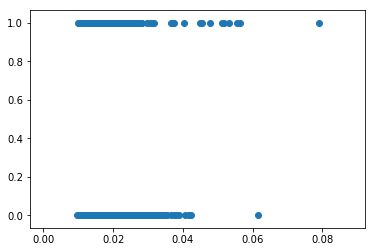

No 21 feature 


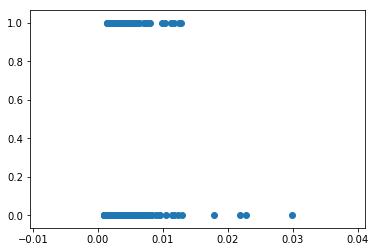

No 22 feature 


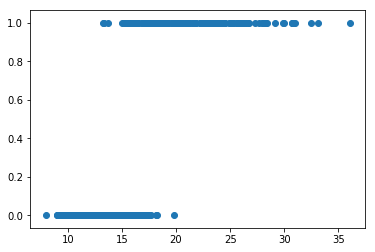

No 23 feature 


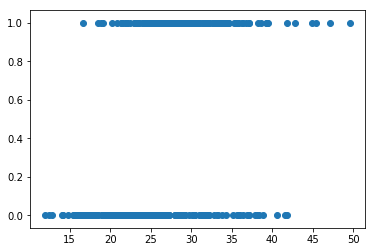

No 24 feature 


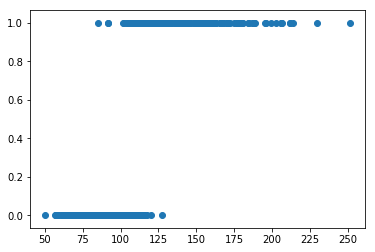

No 25 feature 


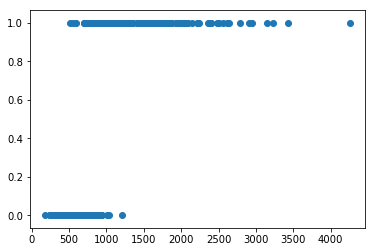

No 26 feature 


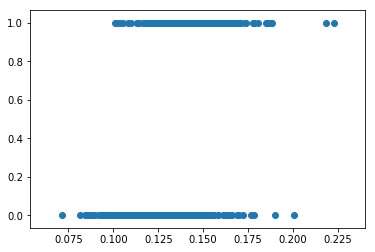

No 27 feature 


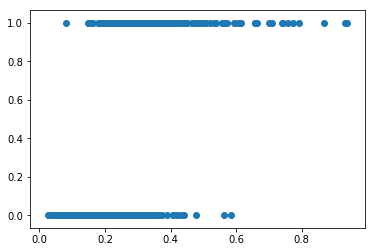

No 28 feature 


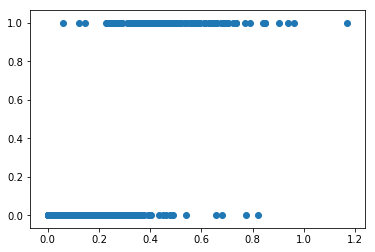

No 29 feature 


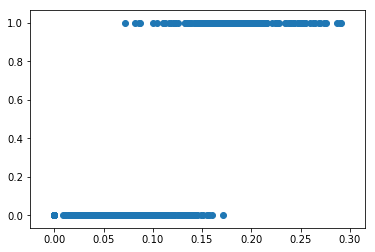

No 30 feature 


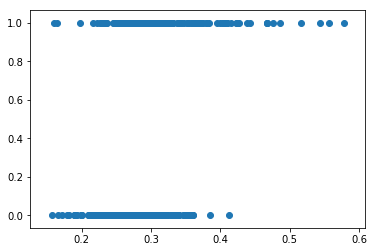

No 31 feature 


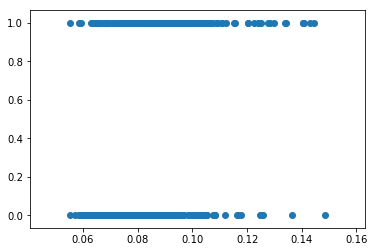

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for feature in range(len(X_train[:][1])):
    print ("No %s feature "%(feature+2))
    plt.scatter(X_train[:,feature],y_train[:])
    plt.show()


##### Pipeline

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

pipe_lr = Pipeline([('std',StandardScaler()),
                    ('pca',PCA(n_components=2)),
                    ('clf',LogisticRegression(random_state=1))])

param_grid = [{'clf':[SVC()],'clf__C':[0.001,0.01,0.1,1,10,100],'clf__gamma':[0.001,0.01,0.1,1,10,100]},
              {'clf':[LogisticRegression(random_state=1)],'clf__C':[0.001,0.01,0.1,1,10,100]}]

grid_obj = GridSearchCV(pipe_lr,param_grid=param_grid,cv=5)


grid_obj.fit(X_train,y_train)


#LogisticRegression().get_params().keys()

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=Fals...alty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'clf': [SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)], 'clf__C':...ar', tol=0.0001,
          verbose=0, warm_start=False)], 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [92]:
display(
    grid_obj.score(X_test,y_test),
    grid_obj.best_params_)

0.95614035087719296

{'clf': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), 'clf__C': 0.1}

In [94]:
grid_obj.best_estimator_.named_steps["pca"].components_

array([[ 0.22596623,  0.11013158,  0.2332209 ,  0.22755397,  0.13649918,
         0.2377466 ,  0.25605611,  0.25865544,  0.13488171,  0.04887139,
         0.20652595,  0.01419346,  0.21172066,  0.20212844,  0.01045879,
         0.16683597,  0.15663101,  0.17983036,  0.03743804,  0.09374714,
         0.23123004,  0.10807696,  0.23932531,  0.22758127,  0.12380417,
         0.2093098 ,  0.23031378,  0.24776701,  0.1218338 ,  0.12751058],
       [-0.21781736, -0.05914039, -0.19910706, -0.21496311,  0.19117063,
         0.15618645,  0.06090262, -0.02864219,  0.18746166,  0.37876924,
        -0.09395551,  0.10801186, -0.07827436, -0.14156858,  0.2210312 ,
         0.24892844,  0.21338357,  0.15120176,  0.20013734,  0.30246828,
        -0.21261316, -0.05409229, -0.19213296, -0.21199806,  0.1535155 ,
         0.12816483,  0.07995777, -0.01785817,  0.1130701 ,  0.26875467]])

#### cross validation

In [57]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train[train]), score))
    

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956


```python
list1 = ["这", "是", "一个", "测试"]
for i in range (len(list1)):
    print i ,list1[i]

上述方法有些累赘，利用enumerate()会更加直接和优美：
list1 = ["这", "是", "一个", "测试"]
for index, item in enumerate(list1):
    print index, item
>>>
0 这
1 是
2 一个
3 测试
```

In [60]:
from sklearn.cross_validation import cross_val_score
import numpy as np
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=-1)
print ('CV accuracy: \n',scores)
print (np.sum(scores))
print (np.std(scores))

CV accuracy: 
 [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]
9.49565217391
0.0291902591093


#### learning curce visualization

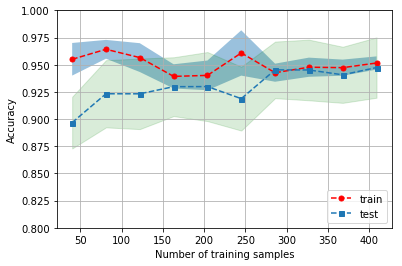

In [107]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('std',StandardScaler()),('clf',LogisticRegression())])
pipe_lr.fit(X_train,y_train)

train_size, train_score, test_score = learning_curve(grid_obj,\
                                                     X_train,y_train,\
                                                     train_sizes=np.linspace(0.1,1,10),\
                                                     cv=10,n_jobs=1)


train_mean = np.mean(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)

train_std = np.std(train_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(train_size, train_mean, marker='o',linestyle='--', color='red', markersize= 5,label='train')


plt.fill_between(train_size, train_mean+train_std, train_mean-train_std, alpha=0.45)


plt.plot(train_size, test_mean, marker='s', linestyle='--', markersize= 5,label='test')

plt.fill_between(train_size, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')



plt.ylim([0.8,1])
plt.legend(loc='lower right')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.grid()
plt.show()






#### Validation curve

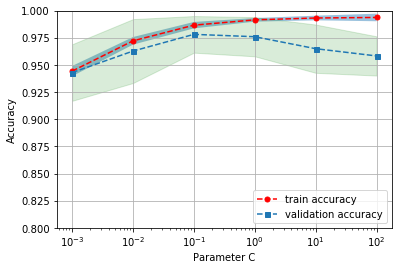

In [12]:
from sklearn.learning_curve import validation_curve

para = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores,test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,
                                            param_name='clf__C',
                                            param_range=para,cv=10)
#pipe_lr.get_params().keys()

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(para, train_mean, marker='o',linestyle='--', color='red', markersize= 5,label='train accuracy')

plt.fill_between(para, train_mean+train_std, train_mean-train_std, alpha=0.45)

plt.plot(para, test_mean, marker='s', linestyle='--', markersize= 5,label='validation accuracy')

plt.fill_between(para, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')


plt.ylim([0.8,1])
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()



#### GridsearchCV

In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

pipe_sv = Pipeline([('scl', StandardScaler()),('clf',SVC(random_state=1))])
para = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
#estimator.get_params().keys()
param_grid = [{'clf__C':para,'clf__kernel':['linear']},\
              {'clf__C':para,'clf__gamma':para,'clf__kernel':['rbf']}]
grid_obj = GridSearchCV(pipe_sv,param_grid=param_grid,scoring='accuracy',cv=10)

grid_obj.fit(X_train,y_train)

print grid_obj.best_params_

best = grid_obj.best_estimator_

best.fit(X_train,y_train)

print best.score(X_test,y_test)

{'clf__C': 0.1, 'clf__kernel': 'linear'}
0.964912280702


In [15]:
scores = cross_val_score(pipe_sv,X,y,scoring='accuracy',cv=10,n_jobs=-1)
print np.mean(scores)
print np.std(scores)

0.97543535563
0.0251484960343


#### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
pipe_sv.fit(X_train,y_train)
y_pred = pipe_sv.predict(X_test)

confmat = confusion_matrix(y_test,y_pred)
print confmat


[[71  1]
 [ 2 40]]


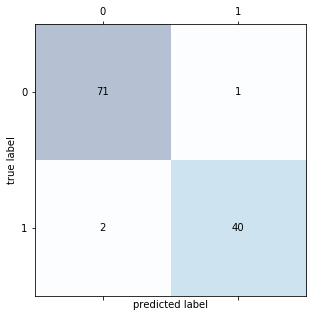

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

#### ROC曲線

- The function roc_curve computes the receiver operating characteristic curve, or ROC curve. 

- “A receiver operating characteristic (ROC) is a graphical plot which **illustrates the performance of a binary classifier system as its discrimination threshold is varied.** It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

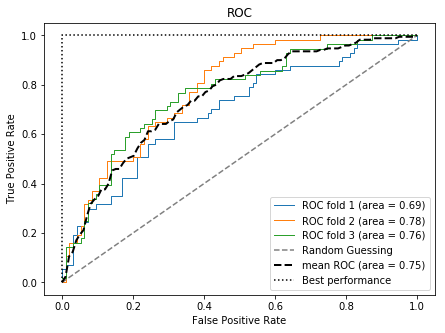

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
                            f1_score, roc_curve, auc, make_scorer
from scipy import interp

X_train2 = X_train[:,[4,14]]
cv = list(StratifiedKFold(n_splits=3,random_state=1).split(X_train,y_train))

#Set figure
fig = plt.figure(figsize=(7,5))
#initalize y
mean_tpr = 0.0
#initalize x
mean_fpr = np.linspace(0, 1, 100)

all_tpr = []


#plot ROC of fold1,2,3
for i, (train,test) in enumerate(cv):
    prob = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
                                #y_true, y_score
    fpr, tpr, thresh = roc_curve(y_train[test],prob[:,1],pos_label=1)
    
    #interpolation.
    mean_tpr += interp(mean_fpr,fpr,tpr)
    
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    


#plot ROC of Random Guessing
plt.plot([0,1],[0,1],linestyle = '--',color='gray',label='Random Guessing')


#plot ROC of Mean
mean_tpr /= len(cv)
#mean_tpr[-1]=1.0

mean_auc = auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,linestyle = '--',color='black',lw=2,label='mean ROC (area = %0.2f)'\
                                         % mean_auc)

#plot ROC of Best Performance
plt.plot([0,0,1],[0,1,1],linestyle = ':',color='black',label='Best performance')



#Modify jpg and show
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()